In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#White Gaussian Noise ~ 10 sec (20 X 10^-9 sampling rate)
N_samples = 500000000
white_noise = np.random.normal(0.0,1.0, N_samples)

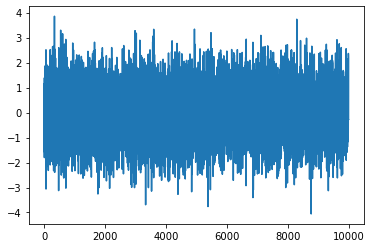

In [3]:
plt.plot(white_noise[:10000])

In [3]:
def gaussian(x,mu):
    numerator = np.exp((-1*(x - mu)**2)/2)
    denominator = np.sqrt(2*np.pi)
    gaussian = 100*(numerator/denominator)
    return gaussian

In [4]:
N = 100000000
x = np.linspace(0,N,N)
mu = N/2
gaussian_samples = gaussian(x,mu)

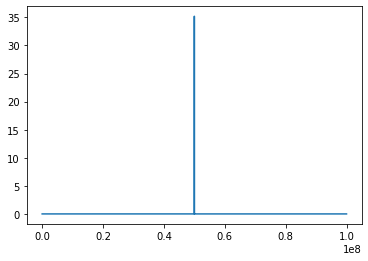

In [6]:
plt.plot(gaussian_samples)

In [5]:
gaussian_timeseries = gaussian_samples
for i in range(1,10):
    d = np.linspace(i*N, (i+1)*N, N)
    mu = N/2 + i*N
    g = gaussian(d,mu)
    gaussian_timeseries = np.concatenate((gaussian_timeseries,g))

                                

In [6]:
# plt.plot(gaussian_timeseries)
np.shape(gaussian_timeseries)

(1000000000,)

In [7]:
final_timeseries = white_noise + gaussian_timeseries[:N_samples]

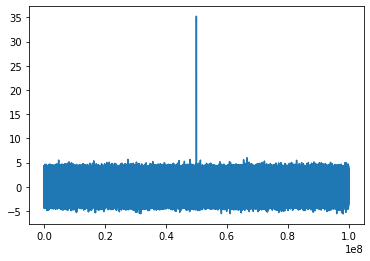

In [11]:
a = 1
plt.plot(final_timeseries[a*N:a*N+N])

In [14]:
N//4096


122070

In [8]:
Nx = 4096
fft_r = []
fft_i = []
for i in range(N_samples//Nx):
    sample_timeseries = final_timeseries[i*Nx:i*Nx + Nx]
    fft_p = np.fft.fft(sample_timeseries)
    fft_pulsar = fft_p[int(Nx/2):]
#     fft_pulsar = np.fft.fftshift(fft_pulsar)
    for ff in fft_pulsar:
        fft_r.append(ff.real)
        fft_i.append(ff.imag)

In [9]:
len(fft_i)

249999360

In [10]:
fft_r = np.clip(fft_r,-128,127)
fft_i = np.clip(fft_i,-128,127)

In [11]:
final_fft_r = []
final_fft_i = []
for i in range(np.shape(fft_r)[0]):
    final_fft_r.append(int(fft_r[i]))
    final_fft_i.append(int(fft_i[i]))

In [14]:
h = open('pulsar_2s.vlt','wb')

In [15]:
for i in range(len(final_fft_r)):
    h.write(final_fft_r[i].to_bytes(1,byteorder='big',signed=True))
    h.write(final_fft_i[i].to_bytes(1,byteorder='big',signed=True))

In [16]:
h.close()

In [ ]:
#Reading Pulsar Timeseries Raw file
f = open('pulsar_timeseries.raw','rb')

In [ ]:
data = f.read(10000)

In [ ]:
byte_array = []
for string in data:
    byte_array.append(np.int8(string))

In [ ]:
plt.plot(byte_array[:100000])